# Logistic Regression
---

* Logistic regression is a machine learning algorithm to classify, i.e., to make a prediction from one or more independent variables about a categorical variable
* We can peform:
    * binary classification: two classes
    * multiclass classification: more than two classes

* Logistic regression is a method that predicts the probability of a data point belonging to a specific class (usually class 1):
  $$P(Y=1|X) = \frac{1}{1+e^{-z}}$$

and  $z=\beta_0 + \beta_1 X1 + ... + \beta_p X_p$, $\beta_0$ is the intercept and $\beta_1, \beta_p$ are the coefficients for the features $X_1, ..., X_p$.

## 1. Sigmoid Function
---
* A sigmoid (or logistic) function has a characteristic "S-shape" curve.



<div class="alert alert-block alert-warning">
    
<b>Logistic function:</b> 

It is defined for $z \in \mathbb{R}^{n}$ by:


    
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

</div>

<div class="alert alert-block alert-success">
<b>Plot the logistic function</b> 

Plot the logistic function for $z \in [-10,10]$, including the threshold line that allows the classification. Generate a vector in that range and then use the function of matplotlib.
    
</div>

# 2. The problem
---
* We want to determine whether songs played on Spotify are popular or not, based on various features that define the song.
Our objective is to classify songs in the Spotify dataset into two categories: **popular** and **not popular**.
* Using the popularity feature, we will create a new binary column, is_popular, to represent this classification. The goal is to predict whether a track is popular using selected features such as danceability, energy, tempo, and more.
* This problem shows the application of machine learning for binary classification using real-world datasets.
* For this task, we will use the Spotify Track Popularity dataset.

# Loading packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


# 3. Dataset

In [5]:
data=pd.read_csv('../data/tracks.csv')
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
cols=list(data.columns)
print(cols)

['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Data pre-processing

First, we have to create the label of each data point. We will consider popular the songs that have the feature popularity > 70

In [7]:
# Select features and target
features = ['danceability', 'energy', 'tempo', 'loudness', 'valence', 'speechiness', 'duration_ms','instrumentalness','liveness','acousticness']

data['is_popular'] = (data['popularity'] > 70).astype(int)
X = data[features]

from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = data['is_popular']


## Training and testing sets generation

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

* We will use the [LogisticRegression()](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) provided by sckit-learn.

In [9]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

## Model Evaluation

In [10]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9897132143009332


<div class="alert alert-block alert-warning">
<b>Accuracy:</b> The accuracy is around 0.9! We have a good model :-)
    
Can we say the Logistic Regression Model has good performance?

</div>

<div class="alert alert-block alert-success">
<b>Performance metrics</b> 

<ul>
  <li>Compute and plot the confusion matrix, how it looks?</li>
  <li>Compute the following performance metrics: precision, recall, F1 score, ROC AUC</li>
    <li>Is it good the performance of the Regression Model?</li>
</ul>
    
    
</div>

In [11]:
def plot_metrics(y_test,y_pred):
   


In [ ]:
plot_metrics(y_test,y_pred)

<div class="alert alert-block alert-success">
<b>Improve the model performance</b> 

<ul>
  <li>Check the class proportion of the dataset</li>
  <li>What parameter can you use in the Logistic Regression to adress the class proportion</li>
   <li>Train a new model</li>
</ul>
    
    
</div>

In [ ]:
# You can code here

<div class="alert alert-block alert-success">
<b>Improve the model performance using GridSearchCV</b> 

<ul>
  <li>USe the GridSearchCV function and try the optimization of hyperparameters</li>
</ul>
    
    
</div>

In [15]:
# you can code here

## Bonus: Word Cloud
***
* We will use the package wordcloud. If it is not installed, you can do it writting in a cell: !pip install wordcloud


In [16]:
from wordcloud import WordCloud

plt.figure(figsize = (20, 14))

def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, 
                   min_font_size=25, colormap='tab20',
                   background_color='white', 
                   prefer_horizontal=.95, 
                   width=2100, 
                   height=700, random_state=0)

    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


<Figure size 2000x1400 with 0 Axes>

In [17]:
#!pip install wordcloud

<div class="alert alert-block alert-success">
<b>Leading artist wourd cloud</b> 

<ul>
  <li>Obtain the 20 leading artists and then generate the word cloud of those artists</li>
</ul>
</div>

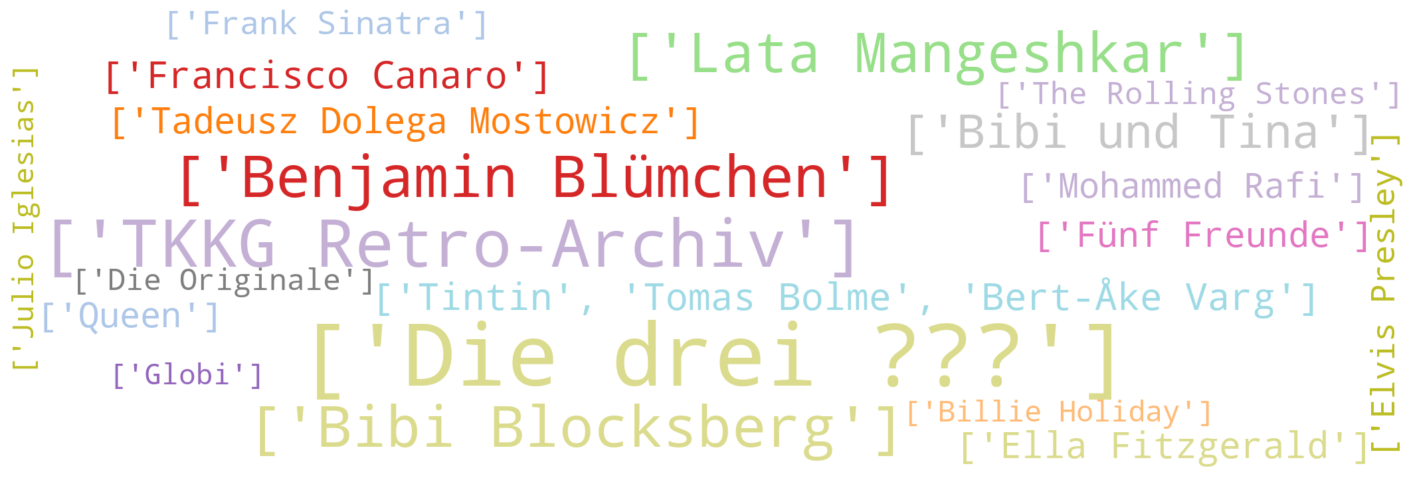

In [30]:
# lead_artists = 
# visualize_word_counts(lead_artists)